In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import scipy
from matplotlib import pyplot as plt

In [2]:
##READING THE COLUMNS DATASET WHICH CONTAIN THE ORIGINBAL COLUMN NAMES
df_temp1 = pd.read_csv("columns.csv")
df_temp1

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country
5,Classical,Classical music
6,Musicals,Musical
7,Pop,Pop
8,Rock,Rock
9,"Metal, Hard rock",Metal or Hardrock


In [3]:
##retrieving a row randomly for verification
df_temp1.loc[75]

original    I live a very healthy lifestyle.
short                         Healthy eating
Name: 75, dtype: object

In [7]:
##READING THE RESPONSES FILE, THE COMPLETE DATASET
df_temp2 = pd.read_csv("responses.csv")
df_temp2.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [37]:
##checking the dimension of the dataframe
df_temp2.shape

(1010, 150)

In [38]:
##EXTRACTING ONLY THE RELEVANT COLUMNS AND MAKING A NEW DATAFRAME WITH THE SAME
df1 = df_temp2[["Finances", "Gender", "Village - town", "Healthy eating"]]
df1.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


In [39]:
##CHECKING THE NUMBER OF NaN VALUES IN EACH COLUMN
df1.isna().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

In [40]:
##displaying all the rows with NaN VALUES
df1_temp1 = df1[df1.isna().any(axis=1)]
df1_temp1

,Finances,Gender,Village - town,Healthy eating
45,4.0,male,NaN,5.0
137,4.0,NaN,village,1.0
201,2.0,NaN,village,3.0
219,NaN,male,city,1.0
226,3.0,NaN,village,3.0
317,3.0,male,city,NaN
368,4.0,female,NaN,4.0
542,2.0,NaN,city,4.0
621,3.0,NaN,city,4.0
629,1.0,female,city,NaN


In [41]:
df1_temp1.shape

(16, 4)

In [42]:
##IMPUTING THE NaN VALUES WITH MODE, COLUMN-WISE
df1_new = df1.fillna(df1.mode().iloc[0])

In [43]:
##checking if all the NaN values have been replaced across the dataset
df1_new.isna().sum()

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

In [44]:
##displaying the new dataframe after replacing all the NaN values
df1_new.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


GROUPING BY FINANCES & GENDER

In [45]:
df1_new.groupby(["Finances", "Gender"])["Gender"].count()

Finances  Gender
1.0       female     65
          male       60
2.0       female     98
          male       76
3.0       female    223
          male      138
4.0       female    150
          male      102
5.0       female     63
          male       35
Name: Gender, dtype: int64

GROUPING BY FINANCES & LOCATION

In [46]:
df1_new.groupby(["Finances", "Village - town"])["Village - town"].count()

Finances  Village - town
1.0       city               88
          village            37
2.0       city              133
          village            41
3.0       city              265
          village            96
4.0       city              168
          village            84
5.0       city               57
          village            41
Name: Village - town, dtype: int64

GROUPING BY LIFESTYLE & GENDER

In [47]:
df1_new.groupby(["Healthy eating", "Gender"])["Gender"].count()

Healthy eating  Gender
1.0             female     36
                male       45
2.0             female     67
                male       70
3.0             female    329
                male      178
4.0             female    147
                male       92
5.0             female     20
                male       26
Name: Gender, dtype: int64

GROUPING BY LIFESTYLE & LOCATION

In [48]:
df1_new.groupby(["Healthy eating", "Village - town"])["Village - town"].count()

Healthy eating  Village - town
1.0             city               58
                village            23
2.0             city               88
                village            49
3.0             city              356
                village           151
4.0             city              177
                village            62
5.0             city               32
                village            14
Name: Village - town, dtype: int64

QUESTION 1 - 

Is saving money(Finances) gender dependent ? 

TEST 1 - CHI SQUARE TEST FOR INDEPENDENCE

NULL HYPOTHESIS: 

H0: There is no difference in saving habits between males and females (saving habit is gender independent)

ALTERNATIVE HYPOTHESIS: 

HA: There is significant difference in the saving habits between males and females (saving habit is gender dependent)

Level of significance chosen, alpha = 0.05

Test Statistic chosen is the chi-square test of independence to find out the difference of categorical variables 

CHECKING THE FREQUENCY DISTRIBUTION - SAVING HABITS OF MALES VS FEMALES 

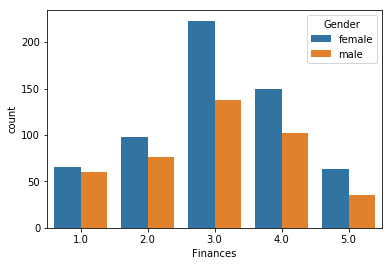

In [49]:
sns.countplot(x='Finances', hue = 'Gender', data = df1_new)

The distribution looks identical for both the genders. 

There doesnt seem to be any level with relatively low frequecy, hence doesn't call for any further handling by combining low frequency level with other levels. 

EXTRACTING DATA FROM THE DATAFRAME FOR PREPARING THE CONTINGENCY TABLE

PREPARING CONTIGENCY TABLE

In [50]:
data_crosstab1 = pd.crosstab(df1_new['Gender'], df1_new['Finances'],margins = False)         
print(data_crosstab1)

Finances  1.0  2.0  3.0  4.0  5.0
Gender                           
female     65   98  223  150   63
male       60   76  138  102   35


CALCULATING THE P VALUE OR THE CHI-SQUARE STATISTIC VALUE

In [51]:
chi2sq_1, pval_1, deg_1, exp_1 = scipy.stats.chi2_contingency(data_crosstab1, correction=True, lambda_=None)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi2sq_1, pval_1, deg_1))
print("\n The expected frequencies table \n")
print(exp_1)

Chi-square statistic 5.32889 P value 0.255185 Degrees of freedom 4

 The expected frequencies table 

[[ 74.13366337 103.19405941 214.0980198  149.45346535  58.12079208]
 [ 50.86633663  70.80594059 146.9019802  102.54653465  39.87920792]]


OBSERVATIONS & CONCLUSIONS:

1. In this example, p value is 0.255 and > 0.05, so we DO NOT REJECT the null hypothesis.

2. HENCE WE CONCLUDE THAT SAVING HABIT(FINANCES) IS GENDER INDEPENDENT.

QUESTION 1 - 

TEST 2 - MANN-WHITNEY U TEST

In [55]:
##performing the Mann-Whitney U test
M = np.array(df1_new.Finances[df1_new.Gender == 'male'])
F = np.array(df1_new.Finances[df1_new.Gender == 'female'])
U_stat , p_value_FG_MW  = stats.mannwhitneyu(x=F,y=M)
if p_value_FG_MW > 0.05:
    print(f'Since the P_value({p_value_FG_MW.round(3)}) < 0.05, we conclude there is an association between gender and finances')
else: 
    print('We fail to reject the Null')

SyntaxError: invalid syntax (<ipython-input-55-540454188b55>, line 6)

QUESTION 2 - 

Is there any differences in money saving (finances) between people from city or village?

TEST 1 - CHI SQUARE TEST FOR INDEPENDENCE

NULL HYPOTHESIS: 

H0: There is no difference in saving habits between people from city & village (saving habit is location independent)

ALTERNATIVE HYPOTHESIS: 

HA: There is significant difference in the saving habits between people from city & village (saving habit is location dependent)

Level of significance chosen, alpha = 0.05

Test Statistic chosen is the chi-square test of independence to find out the difference of categorical variables 

CHECKING THE FREQUENCY DISTRIBUTION - SAVING HABITS OF PEOPLE FROM VILLAGES VS PEOPLE FROM CITIES

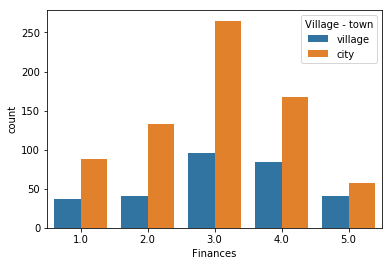

In [25]:
sns.countplot(x='Finances', hue = 'Village - town', data = df1_new)

The distribution looks identical for both the locations. 

There doesn't seem to be any level with relatively low frequecy, hence doesn't call for any further handling by combining low frequency level with other levels. 

EXTRACTING DATA FROM THE DATAFRAME FOR PREPARING THE CONTINGENCY TABLE

PREPARING CONTIGENCY TABLE

In [26]:
data_crosstab2 = pd.crosstab(df1_new['Village - town'], df1_new['Finances'],margins = False)         
print(data_crosstab2)

Finances        1.0  2.0  3.0  4.0  5.0
Village - town                         
city             88  133  265  168   57
village          37   41   96   84   41


CALCULATING THE P VALUE OR THE CHI-SQUARE STATISTIC VALUE

In [27]:
chi2sq_2, pval_2, deg_2, exp_2 = scipy.stats.chi2_contingency(data_crosstab2, correction=True, lambda_=None)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi2sq_2, pval_2, deg_2))
print("\n The expected frequencies table \n")
print(exp_2)

Chi-square statistic 13.33600 P value 0.009746 Degrees of freedom 4

 The expected frequencies table 

[[ 87.9950495  122.48910891 254.12970297 177.3980198   68.98811881]
 [ 37.0049505   51.51089109 106.87029703  74.6019802   29.01188119]]


OBSERVATIONS & CONCLUSIONS:

1. In this example, p value is 0.0097 and < 0.05, so we REJECT the null hypothesis.

2. HENCE WE CONCLUDE THAT THERE IS SIGNIFICANT DIFFERENCE IN MONEY SAVING (FINANCES) BETWEEN PEOPLE FROM CITIES AND THOSE FROM VILLAGGES.

QUESTION 2 - 

MANN-WHITNEY U TEST

In [28]:
##performing the Mann-Whitney U test
M = np.array(df1_new.Finances[df1_new["Village - town"] == 'city'])
F = np.array(df1_new.Finances[df1_new["Village - town"] == 'village'])
U_stat , p_value_FL_MW  = stats.mannwhitneyu(x=F,y=M)
if p_value_FL_MW < 0.05:
    print(f'Since the P_value({p_value_FL_MW.round(4)}) < 0.05, we conclude there is an association between location and finances')
else: 
    print('We fail to reject the Null')

SyntaxError: invalid syntax (<ipython-input-28-3d570a60e7bf>, line 6)

QUESTION 3 - 

Do Women have a Healthier Lifestyle than Men?

TEST 1 - CHI SQUARE TEST FOR INDEPENDENCE

NULL HYPOTHESIS: 

H0: Men & women have the same lifestyle 

ALTERNATIVE HYPOTHESIS: 

HA: Women have a healthier lifestyle 

Level of significance chosen, alpha = 0.05

Test Statistic chosen is the chi-square test of independence to find out the difference of categorical variables 

CHECKING THE FREQUENCY DISTRIBUTION - HEALTHY EATING HABITS OF MEN VS WOMEN

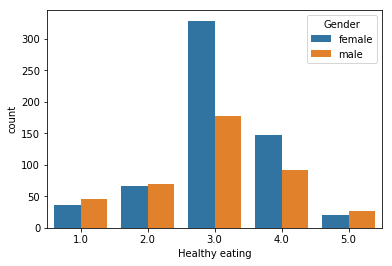

In [29]:
sns.countplot(x='Healthy eating', hue = 'Gender', data = df1_new)

TThe distribution looks identical for both the locations, with the exception of few variations. 

There doesn't seem to be any level with relatively low frequecy, hence doesn't call for any further handling by combining low frequency level with other levels. 

EXTRACTING DATA FROM THE DATAFRAME FOR PREPARING THE CONTINGENCY TABLE

In [30]:
data_crosstab3 = pd.crosstab(df1_new['Gender'], df1_new['Healthy eating'],margins = False)         
print(data_crosstab3)

Healthy eating  1.0  2.0  3.0  4.0  5.0
Gender                                 
female           36   67  329  147   20
male             45   70  178   92   26


CALCULATING THE P VALUE OR THE CHI-SQUARE STATISTIC VALUE

In [31]:
chi2sq_3, pval_3, deg_3, exp_3 = scipy.stats.chi2_contingency(data_crosstab3, correction=True, lambda_=None)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi2sq_3, pval_3, deg_3))
print("\n The expected frequencies table \n")
print(exp_3)
##df= 4
##crit = stats.chi2.ppf(q = 0.95, df=4)
##print("Critical value")
##print(crit)


Chi-square statistic 25.36227 P value 0.000043 Degrees of freedom 4

 The expected frequencies table 

[[ 48.03861386  81.25049505 300.68613861 141.74356436  27.28118812]
 [ 32.96138614  55.74950495 206.31386139  97.25643564  18.71881188]]


OBSERVATIONS & CONCLUSIONS:

1. In this example, p value is 0.00043 and < 0.05, so we REJECT the null hypothesis.

2. HENCE WE CONCLUDE THAT THERE IS SIGNIFICANT DIFFERENCE IN THE LIFESTYLE OF MEN & WOMEN. 

From the contingency tables, it can be concluded that women have a healthier lifestyle than men.

QUESTION 3-

TEST 2 - MANN-WHITNEY U TEST

In [56]:
##performing the Mann-Whitney U test
M = np.array(df1_new["Healthy eating"][df1_new["Gender"] == 'male'])
F = np.array(df1_new["Healthy eating"][df1_new["Gender"] == 'female'])
U_stat , p_value_LG_MW  = stats.mannwhitneyu(x=F,y=M)
if p_value_LG_MW < 0.05:
    print('Since the P_value({p_value_LG_MW.round(4)}) < 0.05, we conclude there is an association between gender and lifestyle')
else: 
    print('We fail to reject the Null')

Since the P_value({p_value_LG_MW.round(4)}) < 0.05, we conclude there is an association between gender and lifestyle


QUESTION 4 - 

Are village people healthier than city people ?

TEST 1 - CHI SQUARE TEST FOR INDEPENDENCE

NULL HYPOTHESIS: 

H0: Village people & city people have the same lifestyle 

ALTERNATIVE HYPOTHESIS: 

HA: Village people are healthier 

Level of significance chosen, alpha = 0.05

Test Statistic chosen is the chi-square test of independence to find out the difference of categorical variables 

CHECKING THE FREQUENCY DISTRIBUTION - HEALTHY EATING HABITS OF PEOPLE FROM CITIES VS PEOPLE FROM VILLAGES

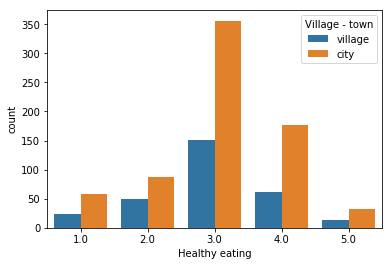

In [33]:
sns.countplot(x='Healthy eating', hue = 'Village - town', data = df1_new)

There doesnt seem to be any level with reelatively low frequecy, hence doesn't call for any further handling by combining low frequency level with other levels. 

EXTRACTING DATA FROM THE DATAFRAME FOR PREPARING THE CONTINGENCY TABLE

In [34]:
data_crosstab4 = pd.crosstab(df1_new['Village - town'], df1_new['Healthy eating'],margins = False)         
print(data_crosstab4)

Healthy eating  1.0  2.0  3.0  4.0  5.0
Village - town                         
city             58   88  356  177   32
village          23   49  151   62   14


CALCULATING THE P VALUE OR THE CHI-SQUARE STATISTIC VALUE

In [35]:
chi2sq_4, pval_4, deg_4, exp_4 = scipy.stats.chi2_contingency(data_crosstab4, correction=True, lambda_=None)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi2sq_4, pval_4, deg_4))
print("\n The expected frequencies table \n")
print(exp_4)

Chi-square statistic 4.11472 P value 0.390703 Degrees of freedom 4

 The expected frequencies table 

[[ 57.02079208  96.44257426 356.90792079 168.24653465  32.38217822]
 [ 23.97920792  40.55742574 150.09207921  70.75346535  13.61782178]]


OBSERVATION & CONCLUSIONS:

1. In this example, p value is 0.39 and > 0.05, so we FAIL TO REJECT the null hypothesis.

2. HENCE WE CONCLUDE THAT HEALTHY EATING HABIT IS INDEPENDENT OF THE LOCATION (CITY OR VILLAGE) 

3. THEREFORE, AT 0.05 LEVEL OF SIGNIFICANCE, WE CANNOT SAY THAT ONE GROUP IS HEALTHIER THAN THE OTHER.

QUESTION 4 - 

TEST 2 - MANN-WHITNEY U TEST

In [57]:
##performing the Mann-Whitney U test
M = np.array(df1_new["Healthy eating"][df1_new["Village - town"] == 'city'])
F = np.array(df1_new["Healthy eating"][df1_new["Village - town"] == 'village'])
U_stat , p_value_LL_MW  = stats.mannwhitneyu(x=F,y=M)
if p_value_LL_MW < 0.05:
    print('Since the P_value({p_value_LL_MW.round(4)}) < 0.05, we conclude there is an association between location and lifestyle')
else: 
    print(p_value_LL_MW.round(6))
    print('We fail to reject the Null')

0.085499
We fail to reject the Null
